# Using the Perceptron Algorithm for Machine Learning

A perceptron algorithm generates outputs or decisions based on the product of input features and optimal weight coefficients.

In this project, we will use the perceptron algorithm to classify flowers, given their sepal and petal lengths. We will use a [Kaggle dataset](https://www.kaggle.com/arshid/iris-flower-dataset) to train the perceptron.

## Implementing the perceptron alogrithm in Python

In [1]:
# Importing relevant module

import numpy as np

# Defining the perceptron algorithm as a class

class Perceptron(object):
    '''
    PARAMETERS:
    - eta: A float that ranges from 0.0 through 1.0 and represents the
    learning rate of the perceptron
    - n_iter: An integer that represents the number of times we will
    train the perceptron on data from the training dataset
    - random_state: A random integer that represents the seed to which the
    perceptron will be initialized every time it is run
    
    ATTRIBUTES:
    - w_: A one-dimensional array that represents weights
    - errors_: A list that stores the number of misclassifications that the
    perceptron made in each epoch
    '''
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
        
    def fit(self, X, y):
        '''
        Fits training data
        
        PARAMETERS
        - X: A training vector that has the shape (n_examples, n_features)
        - n_examples: The number of examples or rows in the training vector
        - n_features: The number of features or columns in the training vector
        - y: A one-dimensional array of target values
        
        OUTPUT
        - self, an object
        '''        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    
    def net_input(self, X):
        '''
        Calculates net input
        '''        
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def predict(self, X):
        '''
        Returns class label
        '''
        return np.where(self.net_input(X) >= 0.0, 1, -1)    

## Training a perceptron model

In [2]:
# Importing the required dataset

import pandas as pd

df = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')

In [3]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The species column of the dataset lists three species.

In [5]:
df.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In this project, we will use only the setosa and versicolor species. Let us extract rows that pertain to these species and then convert the species names to binary values, -1 for setosa and 1 for versicolor. These values will be our target.

In [6]:
y = df.loc[0:99, 'species'].values

In [7]:
y = np.where(y=='Iris-setosa', -1, 1)

Next, we will extract the two independent features on which we want to train the perceptron.

In [8]:
X = df.loc[0:99, ['sepal_length', 'petal_length']].values

How are the independent variables distributed per specifies?

In [9]:
# Setting the environment for plots

import seaborn as sns
import util_eda as ueda
import matplotlib.pyplot as plt

ueda.set_sns_styles()

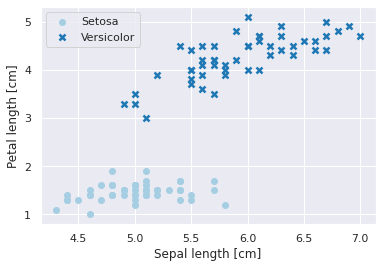

In [10]:
plt.scatter(X[:50, 0], X[:50, 1], marker='o', label='Setosa')
plt.scatter(X[50:, 0], X[50:, 1], marker='x', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left');

The distributions for the two species are distinct and easy to identify in a graph. A perceptron model should be able to classify the independent variables accurately. Let us train a perceptron and find out how it performs.

In [11]:
perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(X, y);

Next, let us plot any misclassification errors in each training epoch.

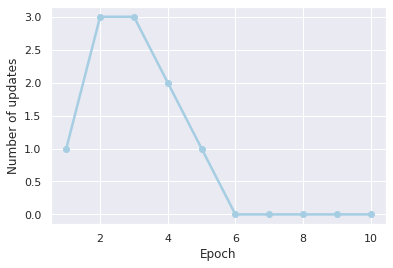

In [12]:
plt.plot(range(1, len(perceptron.errors_) + 1),\
         perceptron.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of updates');

The graph shows that the perceptron was able to classify the data accurately from the 6$^{th}$ epoch onwards.

Let us also plot the decision boundaries of the data. We will write a function to do so and then implement the function.

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, classifier, resolution=0.02):
    markers = ('o', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8,\
                    c=colors[idx], marker=markers[idx],\
                    label='Setosa' if cl==-1 else 'Versicolor',\
                    edgecolor='black')

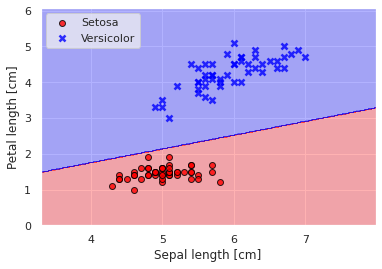

In [14]:
plot_decision_boundaries(X, y, classifier=perceptron)

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left');

There are distinct decision regions and a decision boundary in the graph. The perceptron was able to classify all the flowers correctly.